# Project1: Network Analysis: Centrality Measures

**GROUP: Forhad Akbar, Adam Douglas, and Soumya Ghosh**

For your first project, you are asked to -

 - Identify and load a network dataset that has some categorical information available for each node.
 - For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
 - Compare your centrality measures across your categorical groups.

## Data Description: The political blogosphere network

The network of political blogs was first analyzed in “The political blogosphere and the 2004 US Election” by Lada A. Adamic and Natalie Glance, in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005). This data set, collected before the 2004 American presidential election, records hyperlinks connecting political blogs to one another. These blogs have been labeled manually as either “liberal” or “conservative”. 

Node "value" attributes indicate political leaning according to:

  - 0 (left or liberal)
  - 1 (right or conservative)

Data on political leaning comes from blog directories as indicated.  Some blogs were labeled manually, based on incoming and outgoing links and posts around the time of the 2004 presidential election.  Directory-derived labels are prone to error; manual labels even more so.

Links between blogs were automatically extracted from a crawl of the front page of the blog.

## Objective
We are aiming to analyze and find answers to below questions leveraging this dataset -

1. Which category is more represented in the data (e.g. simple count of nodes in each category)
2. Which Website(s) are the major sources for these blog posts? 
3. Which node(s) have a higher incoming degree centrality by category (i.e. more popular, therefore quoted more)
4. Which node(s) in each category have higher degree centrality from the opposite category (i.e. a liberal blog quoting a conservative blog)
5. Most popular platforms by category (e.g. Blogspot, AmericanPolitics.com, etc.)
6. Most influential nodes by category (Eigenvector Centrality)
7. Highest out-degrees (who is more prolific in linking to other blogs)
8. Any interesting subnetworks we may discover

## Import Python Packages

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
from pyvis import network as net
import matplotlib.pyplot as plt
import seaborn as sns
# create number for each group to allow use of colormap
from itertools import count, groupby
import collections

%matplotlib inline
sns.set()

## Load Political Blogs dataset

In [6]:
G = nx.read_gml(path="Dataset/polblogs.gml")

print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 1490
Number of edges: 19090
Average in degree:  12.8121
Average out degree:  12.8121


## Print first 10 nodes of the graph

Let's start our analysis with a preview of first 10 blog post entries in the dataset -

In [7]:
list(G.nodes.data())[1:10]

[('12thharmonic.com/wordpress', {'value': 0, 'source': 'BlogCatalog'}),
 ('40ozblog.blogspot.com', {'value': 0, 'source': 'Blogarama,BlogCatalog'}),
 ('4lina.tblog.com', {'value': 0, 'source': 'Blogarama'}),
 ('750volts.blogspot.com', {'value': 0, 'source': 'Blogarama'}),
 ('95theses.blogspot.com', {'value': 0, 'source': 'Blogarama'}),
 ('abbadabbaduo.blogspot.com',
  {'value': 0, 'source': 'Blogarama,LeftyDirectory'}),
 ('aboutpolitics.blogspot.com',
  {'value': 0, 'source': 'Blogarama,eTalkingHead'}),
 ('achingandspinning.blogspot.com', {'value': 0, 'source': 'Blogarama'}),
 ('ackackack.com', {'value': 0, 'source': 'BlogCatalog'})]

From the sample records above, we can see that there are two categorical attributes present in the dataset -
 - **'value'**: The political view type in the blog post (0 - Left/Liberal & 1 - Right/Conservative).
 - **'source'**: The Blog Website where the post was sourced from. 

## Assigning the 'color' attribute to nodes
Next, we are going to add a color attribute for each blogpost node as an additional attribute.


In [9]:
node_list = list(G.nodes())
nx_graph = nx.Graph(G)
types = list(nx.get_node_attributes(nx_graph,'value').values())

df_col = pd.DataFrame(types, columns = ['type'])
df_col['color'] = np.where(df_col['type'] == 0, "blue", "red")

# Create dictionary object to add the color for each node
color_dict = { k:v for k,v in zip(node_list,list(df_col['color']))}
color_dict
nx.set_node_attributes(G, color_dict, 'color')

# Confirm the addition of 'color' attribute to the graph nodes
list(G.nodes.data())[1:10]

[('12thharmonic.com/wordpress',
  {'value': 0, 'source': 'BlogCatalog', 'color': 'blue'}),
 ('40ozblog.blogspot.com',
  {'value': 0, 'source': 'Blogarama,BlogCatalog', 'color': 'blue'}),
 ('4lina.tblog.com', {'value': 0, 'source': 'Blogarama', 'color': 'blue'}),
 ('750volts.blogspot.com',
  {'value': 0, 'source': 'Blogarama', 'color': 'blue'}),
 ('95theses.blogspot.com',
  {'value': 0, 'source': 'Blogarama', 'color': 'blue'}),
 ('abbadabbaduo.blogspot.com',
  {'value': 0, 'source': 'Blogarama,LeftyDirectory', 'color': 'blue'}),
 ('aboutpolitics.blogspot.com',
  {'value': 0, 'source': 'Blogarama,eTalkingHead', 'color': 'blue'}),
 ('achingandspinning.blogspot.com',
  {'value': 0, 'source': 'Blogarama', 'color': 'blue'}),
 ('ackackack.com', {'value': 0, 'source': 'BlogCatalog', 'color': 'blue'})]

## Visualizing the graph dataset -

In [13]:
n = net.Network(height = "800px", width = "100%", notebook = True, 
                bgcolor = "#ffffff", font_color = "black",
                heading = 'Political Blog Sphere Graph Analysis', directed = True)
n.from_nx(nx_graph, default_node_size = 50, default_edge_weight = 1)
#n.enable_physics(True)
n.show_buttons(filter_=['physics'])
n.show("graph.html")

## Distribution of political views in the dataset
We wanted to start off our data anlaysis with a quick view of distribution of political views in blog possts dataste -

In [11]:
## Count of nodes by 'value' attribute
types = list(nx.get_node_attributes(nx_graph,'value').values())
type_counter=collections.Counter(types)
df = pd.DataFrame.from_dict(type_counter, orient='index').reset_index()
df = df.rename(columns={'index':'type', 0:'count'})
df['category'] = np.where(df['type'] == 0, "Left/Liberal", "Right/Conservative")
df

,type,count,category
0,0,758,Left/Liberal
1,1,732,Right/Conservative


From the table above, it can be be inferred that the dataset is pretty much evenly balanced between two opposing political views with 'Left/Liberal' having little more posts.

## Distribution of Blog Posts Sources
We wanted to quickly analyze which Website(s) are the major sources for the political blog posts dataset. So we identified top 10 sources below -


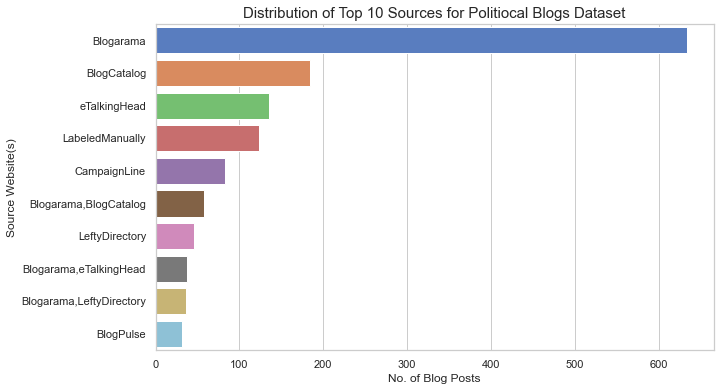

In [12]:
## Count of nodes by 'value' attribute
source = list(nx.get_node_attributes(nx_graph,'source').values())
source_counter=collections.Counter(source)
df1 = pd.DataFrame.from_dict(source_counter, orient='index').reset_index()
df1 = df1.rename(columns={'index':'source', 0:'count'})
#df['category'] = np.where(df['type'] == 0, "Left/Liberal", "Right/Conservative")
df1 = df1.nlargest(10,'count')

#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x = 'count', y = df1.source, data=df1, ci=None, palette="muted",orient='h', )
ax.set_title("Distribution of Top 10 Sources for Politiocal Blogs Dataset", fontsize=15)
ax.set_xlabel ("No. of Blog Posts")
ax.set_ylabel ("Source Website(s)")


bar.savefig("Seaborn_Pie_Chart.png");

Based on the bar chart above, we can clearly see blogarama ([link](https://www.blogarama.com/)) is the major source for the blog entries. 